# 1、项目背景

通过商场客户数据对客户进行分群管理，为目标客户制定营销策略；

通过聚类算法将商场客户分为特定的几类目标群体，对特定群体进行精准营销

# 2、数据导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=[u'SimHei']
%matplotlib inline
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('Mall_Customers.csv',encoding='gb18030')
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
#删除无用属性
newdata=data.copy()
newdata=data.drop('CustomerID',axis=1)
newdata

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
#检查空缺值
newdata.isnull().sum().any()

False

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 3、数据可视化及分析

88
112


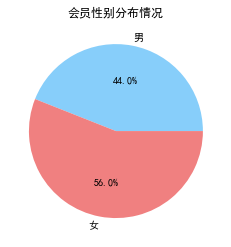

In [6]:
#查看该商场会员的性别分布情况
Male=pd.value_counts(newdata['Gender'])['Male']
Female=pd.value_counts(newdata['Gender'])['Female']
print(Male)
print(Female)
fig=plt.figure(figsize=(10,4))
plt.pie([Male,Female],labels=['男','女'],colors=['lightskyblue','lightcoral'],autopct='%1.1f%%')
plt.title('会员性别分布情况')
plt.show()

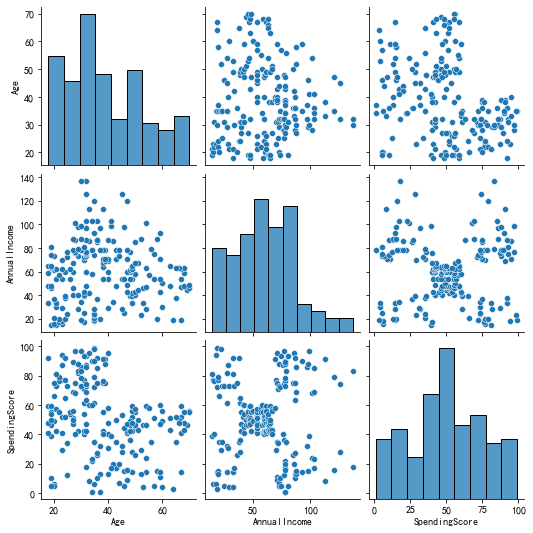

In [7]:
#相关性分析
import seaborn as sns
newdata_corr=newdata[['Gender','Age','AnnualIncome','SpendingScore']]
sns.pairplot(newdata_corr)

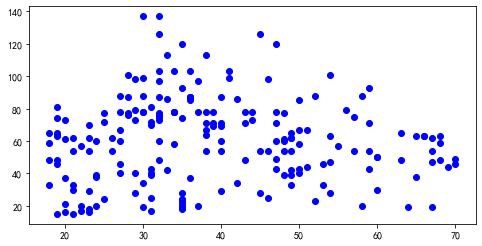

In [8]:
#年龄与年收入分布图
age=newdata['Age']
income=newdata['AnnualIncome']
fig=plt.figure(figsize=(8,4))
plt.scatter(age,income,color='b')
plt.show()

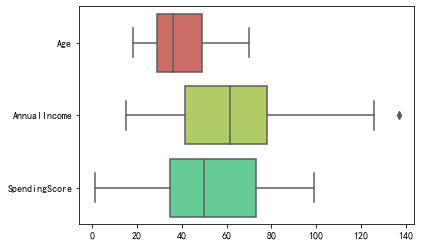

In [9]:
#特征的箱型图
ax=sns.boxplot(data=data[['Age','AnnualIncome','SpendingScore']],orient="h",palette=sns.color_palette("hls",5))

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


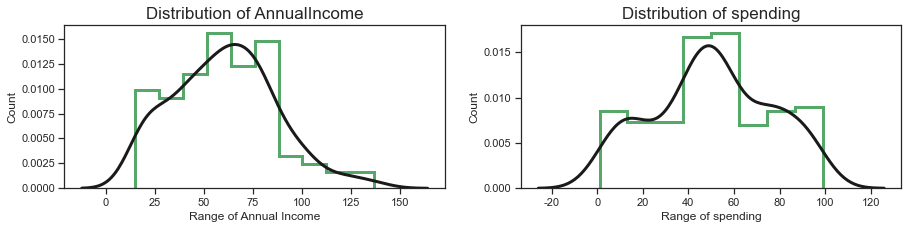

In [10]:
#'AnnualIncome','SpendingScore'的特征值直方图
plt.rcParams['figure.figsize']=(15,3)
sns.set(style='ticks')
plt.subplot(1,2,1)
sns.distplot(data['AnnualIncome'],rug=False,rug_kws={"color":"g"},kde_kws={"color":"k","lw":3,"label":"KDE"},
            hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"g"})
plt.title('Distribution of AnnualIncome',fontsize=17)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(data['SpendingScore'],rug=False,rug_kws={"color":"r"},kde_kws={"color":"k","lw":3,"label":"KDE"},
            hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"g"})
plt.title('Distribution of spending',fontsize=17)
plt.xlabel('Range of spending')
plt.ylabel('Count')
plt.show()

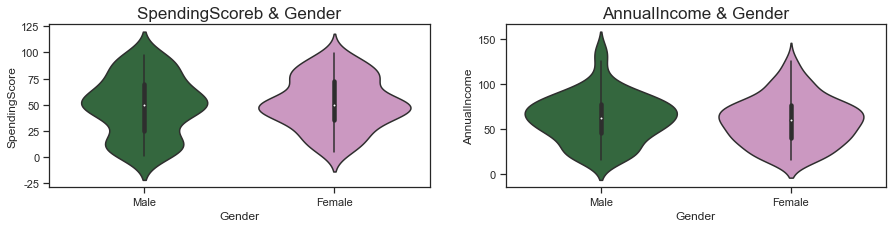

In [11]:
#消费分数、年收入与性别的小提琴图
plt.subplot(1,2,1)
sns.violinplot(x="Gender",y="SpendingScore",data=data,palette='cubehelix')
plt.title('SpendingScoreb & Gender',fontsize=17)

plt.subplot(1,2,2)
sns.violinplot(x="Gender",y="AnnualIncome",data=data,palette='cubehelix')
plt.title('AnnualIncome & Gender',fontsize=17)
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


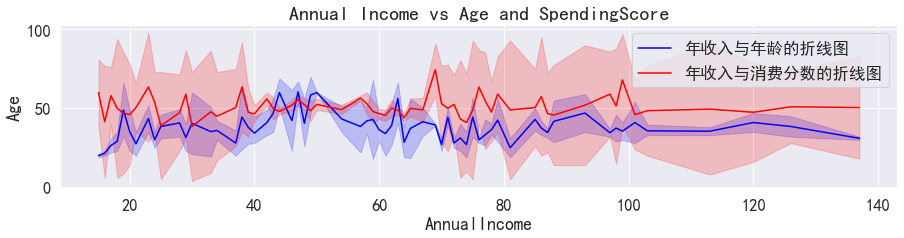

In [12]:
#绘制年龄、消费分数与年收入的折线图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
x=data['AnnualIncome']
y=data['Age']
z=data['SpendingScore']
sns.lineplot(x,y,color='blue',label='年收入与年龄的折线图')
sns.lineplot(x,z,color='red',label='年收入与消费分数的折线图')
plt.title('Annual Income vs Age and SpendingScore',fontsize=20)
plt.show()

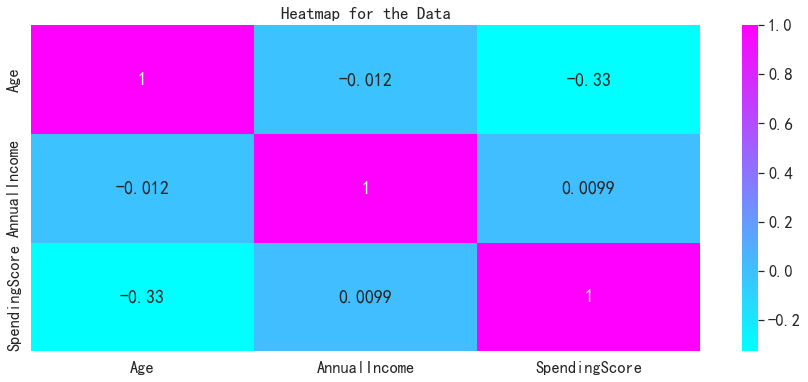

In [13]:
#绘制特征间的热力图
plt.rcParams['figure.figsize']=(15,6)
sns.heatmap(newdata.corr(),cmap='cool',annot=True,square=False)
plt.title('Heatmap for the Data',fontsize=17)
plt.show()

In [14]:
#标准化数据集
x=data.iloc[:,3:5]
x_array=np.array(x)
print(x_array)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_array)
x_scaled

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

方法1：Elbow-Method

In [15]:
#fitting the model for values in range(1,11)
from sklearn.cluster import KMeans
SSD=[]
K=range(1,11)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(x_scaled)
    SSD.append(km.inertia_)

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

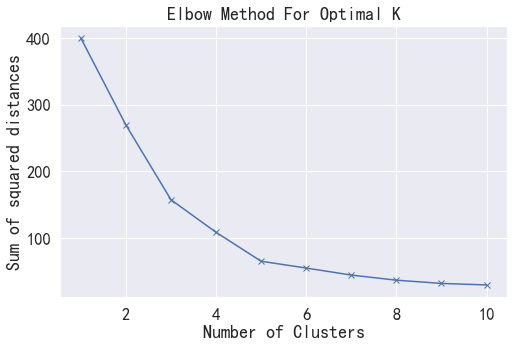

In [16]:
#plotting Elbow
plt.figure(figsize=(8,5))
plt.plot(K,SSD,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')

plt.title('Elbow Method For Optimal K')
plt.show()

K=5是临界点，将K=5作为与集合相匹配的适当数量

K均值聚类分析

In [17]:
from yellowbrick.cluster import KElbowVisualizer
#确定类个数的silhouette分析法，silhouette_score为聚类分析中的轮廓系数
from sklearn.metrics import silhouette_samples,silhouette_score
%matplotlib inline
KMeans_1=KMeans(n_clusters=5)
KMeans_1.fit(x_scaled)
label=KMeans_1.predict(x_scaled)
print("Silhouette Score(n=5):",silhouette_score(x_scaled,label))

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score(n=5): 0.5546571631111091


E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

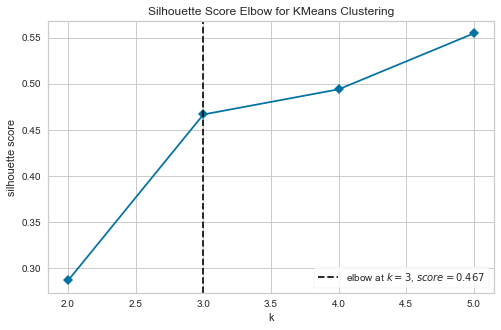

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [19]:
model =KMeans(random_state=123)
Visualizer=KElbowVisualizer(model,k=(2,6),metric='silhouette',timings=False)
plt.figure(figsize=(8,5))
Visualizer.fit(x_scaled)
Visualizer.poof()

In [22]:
#将聚类后的结果添加到数组中
data["cluster"]=KMeans_1.labels_
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


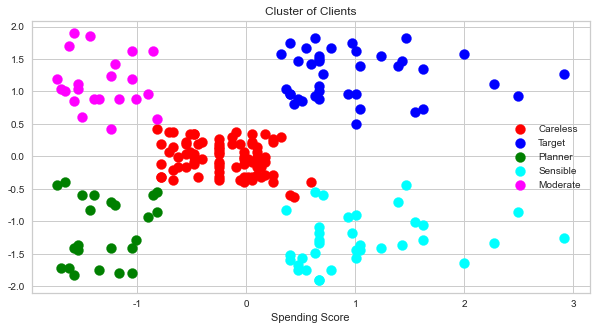

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(x_scaled[label==0,0],x_scaled[label==0,1],s=100,c='red',label='Careless')
plt.scatter(x_scaled[label==1,0],x_scaled[label==1,1],s=100,c='blue',label='Target')
plt.scatter(x_scaled[label==2,0],x_scaled[label==2,1],s=100,c='green',label='Planner')
plt.scatter(x_scaled[label==3,0],x_scaled[label==3,1],s=100,c='cyan',label='Sensible')
plt.scatter(x_scaled[label==4,0],x_scaled[label==4,1],s=100,c='magenta',label='Moderate')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.xlabel('Spending Score')
plt.legend()
plt.show()